In [16]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv(Path('../data/student-mat.csv'), sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [18]:
X = df[['age', 'sex', 'studytime', 'absences', 'G1', 'G2', 'G3']].copy()
X.head(4)

,age,sex,studytime,absences,G1,G2,G3
0,18,F,2,6,5,6,6
1,17,F,2,4,5,5,6
2,15,F,2,10,7,8,10
3,15,F,3,2,15,14,15


In [19]:
X['sex'] = X['sex'].map({'F': 0, 'M': 1})
X.head(3)

,age,sex,studytime,absences,G1,G2,G3
0,18,0,2,6,5,6,6
1,17,0,2,4,5,5,6
2,15,0,2,10,7,8,10


In [20]:
print(f'Dataset has {X.shape[0]} rows and {X.shape[1]} columns')

Dataset has 395 rows and 7 columns


In [21]:
y = X['G3']
X = X.drop('G3', axis=1)
X.head(3)


,age,sex,studytime,absences,G1,G2
0,18,0,2,6,5,6
1,17,0,2,4,5,5
2,15,0,2,10,7,8


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        395 non-null    int64
 1   sex        395 non-null    int64
 2   studytime  395 non-null    int64
 3   absences   395 non-null    int64
 4   G1         395 non-null    int64
 5   G2         395 non-null    int64
dtypes: int64(6)
memory usage: 18.6 KB


In [23]:
df.isnull().sum().sort_values(ascending=False)

school        0
paid          0
G2            0
G1            0
absences      0
health        0
Walc          0
Dalc          0
goout         0
freetime      0
famrel        0
romantic      0
internet      0
higher        0
nursery       0
activities    0
famsup        0
sex           0
schoolsup     0
failures      0
studytime     0
traveltime    0
guardian      0
reason        0
Fjob          0
Mjob          0
Fedu          0
Medu          0
Pstatus       0
famsize       0
address       0
age           0
G3            0
dtype: int64

In [24]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
sex,395.0,0.473418,0.499926,0.0,0.0,0.0,1.0,1.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
absences,395.0,5.708861,8.003096,0.0,0.0,4.0,8.0,75.0
G1,395.0,10.908861,3.319195,3.0,8.0,11.0,13.0,19.0
G2,395.0,10.713924,3.761505,0.0,9.0,11.0,13.0,19.0


In [25]:
X.corr()

,age,sex,studytime,absences,G1,G2
age,1.000000,-0.028606,-0.004140,0.175230,-0.064081,-0.143474
sex,-0.028606,1.000000,-0.306268,-0.066962,0.091839,0.091099
studytime,-0.004140,-0.306268,1.000000,-0.062700,0.160612,0.135880
absences,0.175230,-0.066962,-0.062700,1.000000,-0.031003,-0.031777
G1,-0.064081,0.091839,0.160612,-0.031003,1.000000,0.852118
G2,-0.143474,0.091099,0.135880,-0.031777,0.852118,1.000000


<Axes: xlabel='G3', ylabel='Count'>

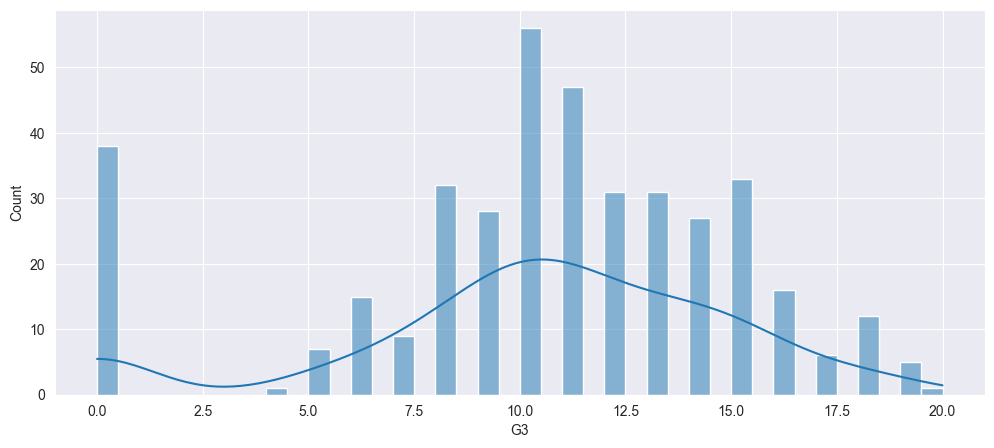

In [26]:
plt.figure(figsize=(12,5))
sns.histplot(y, kde=True, bins=40)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [28]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state=42)

In [29]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [30]:
print(f'Training: {len(X_train)}, Validate: {len(X_val)}, Test: {len(X_test)} ')

Training: 276, Validate: 59, Test: 60 


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [32]:
numeric_features = X.select_dtypes(include='int64').columns.tolist()

In [33]:
preprocess = ColumnTransformer(
    [('scaler', StandardScaler(), numeric_features)], remainder='passthrough'
)
preprocess

,transformers,"[('scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

mdl = Pipeline(
    steps=[('preprocess', preprocess), ('model', LinearRegression(

    ))]
)
mdl

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [35]:
mdl.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [36]:
y_val_pred = mdl.predict(X_val)
y_val_pred

array([ 7.9758711 ,  4.78047107, 10.50586322, 20.36028384,  6.67459665,
       11.26609408,  8.20909164,  8.3574178 , 10.22010184, 11.9446054 ,
        8.51206473, 19.25741069,  8.88649337, 12.13333198,  9.20028122,
        3.68343399, 13.59244222,  7.81484466, 11.97885746, 13.9917095 ,
        8.51282951, 19.03561577, 12.88849155,  6.44999121, 10.19299407,
       15.39154726, 12.82136978, 13.31546103,  5.74063278,  5.55008283,
       14.95391695,  4.15548877, 16.86842908,  3.88597044, 18.4072121 ,
       15.4837573 , 11.15428282,  5.93831824, 11.9500215 , 10.5157855 ,
       16.02236564,  3.26152952,  4.39934434,  9.32747557, 14.04147235,
       10.74917741,  6.9965019 , 10.54046008,  3.34416207,  8.48700269,
       15.12206145, 14.20080415, 13.01137835,  9.49242211,  9.27229559,
       14.24026739, 10.80640312, 15.1991055 ,  3.82912205])

In [37]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [38]:
val_mse = mean_squared_error(y_val_pred, y_val)
val_mse

5.065678445257754

In [39]:
val_rmse = root_mean_squared_error(y_val_pred, y_val)
val_rmse

2.2507062103388247

In [40]:
val_r2 = r2_score(y_val_pred, y_val)
val_r2

0.7265397200272109

In [41]:
val_mae = mean_absolute_error(y_val_pred, y_val)
val_mae

1.411248707033256

In [42]:
print(f'MSE: {val_mse:.2f}, RMSE: {val_rmse:.2f}, R2: {val_r2:.2f}, MAE: {val_mae:.2f}')

MSE: 5.07, RMSE: 2.25, R2: 0.73, MAE: 1.41


In [43]:
y_test_pred = mdl.predict(X_test)
y_test_pred

array([ 9.78266241, -0.41604209,  7.96897438,  9.59022065, 10.51147795,
        5.86088777, 15.69528514, 15.33188836, 13.53674504, 20.20841491,
       15.14392552, 10.59453048,  5.92953177,  8.8105589 , 13.94926231,
        6.72790227, 15.51069267,  7.11222697, 18.61145051,  4.89680596,
        5.46365788,  5.43635353,  6.80272715,  7.79298059, 15.79419326,
       13.45534347,  8.07219211,  7.59718694,  8.87302832,  8.15748065,
        7.88873339, 14.99282137, -1.38236052, 12.57170859,  6.12064993,
        9.03299411,  7.11503748, 13.31171963, 12.90476711, 12.62535902,
        9.29421066,  9.11671148, 17.41602252, 14.48959006,  7.47208097,
       12.3999888 , 14.47590469,  9.29492444,  8.22783291, 15.66384359,
        4.08198749,  6.12064993, 17.09958437,  5.90801251, 13.68314687,
        7.12685157,  8.70283808,  4.07320102,  4.3642061 ,  9.35926193])

In [44]:
test_mse = mean_squared_error(y_test, y_test_pred)
test_mse

3.4202567784070967

In [45]:
test_rmse = root_mean_squared_error(y_test, y_test_pred)
test_rmse

1.849393624517803

In [46]:
test_r2 = r2_score(y_test, y_test_pred)
test_r2

0.8292338233348282

In [47]:
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mae

1.2197474076785706

In [48]:
print(f'MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R2: {test_r2:.2f}, MAE: {test_mae:.2f}')

MSE: 3.42, RMSE: 1.85, R2: 0.83, MAE: 1.22


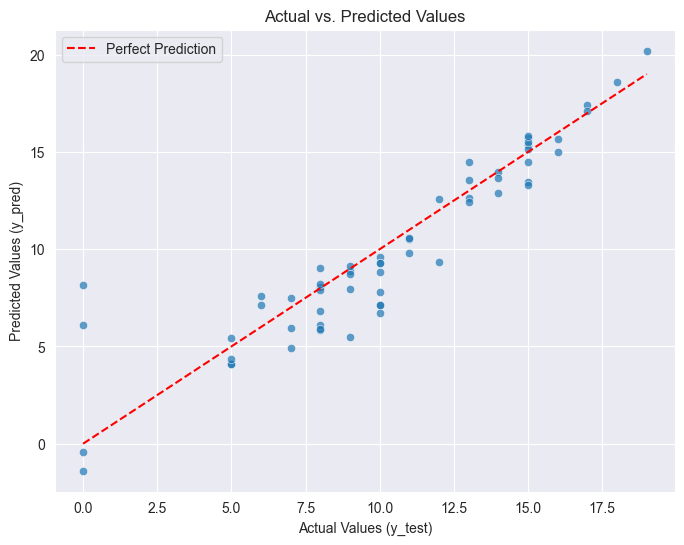

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()


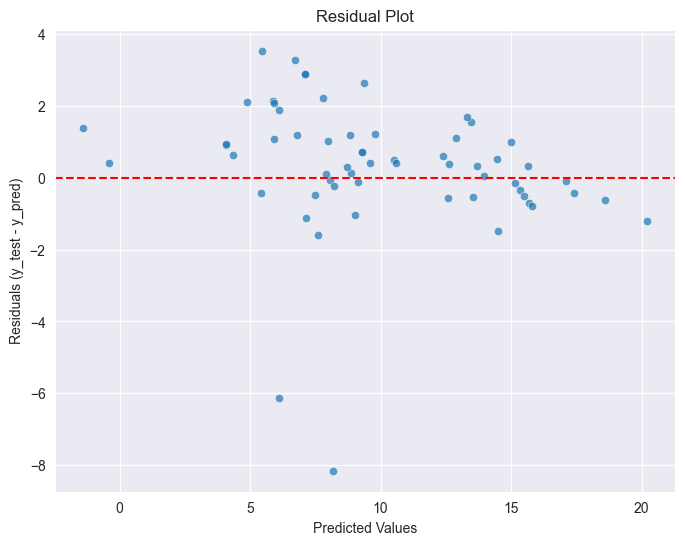

In [50]:
residuals = y_test - y_test_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')

plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y_test - y_pred)")
plt.title("Residual Plot")
plt.show()


Text(0.5, 1.0, 'Histogram of Residuals')

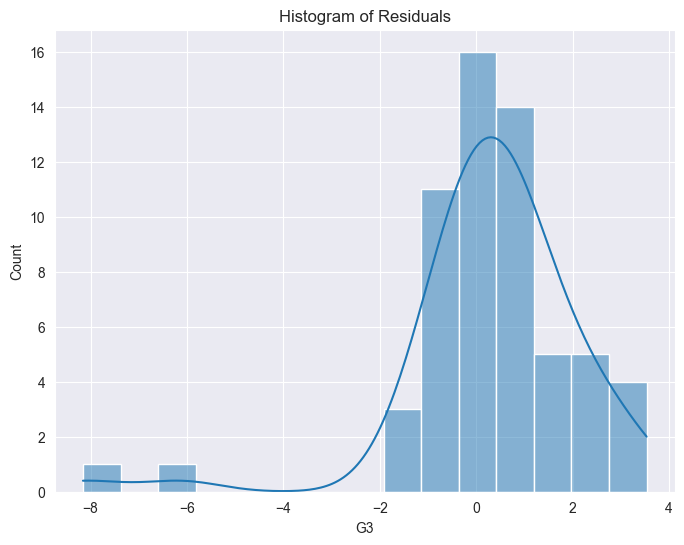

In [51]:
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")


In [52]:
coef = mdl.named_steps['model'].coef_
coef


array([-0.26559228,  0.06613995, -0.01890081,  0.32986369,  0.60627175,
        3.59065426])

In [53]:
pd.DataFrame(coef, index=X.columns, columns=['Coefficients'])

,Coefficients
age,-0.265592
sex,0.066140
studytime,-0.018901
absences,0.329864
G1,0.606272
G2,3.590654


G2 is seen as the dominant predictor of G3 with coefficient 3.59
this means for a 1 point increase in G2, G3 increases by 3.6

RMSE = 1.85 (predictions are wrong by ~1.8 grade points on average)
MAE = 1.2 (Most predictions are off by only about 1 point)
Coefficient or Determination R^2 = 0.83 (Model explains 83% of the variation in final grades(G3))

In [54]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [55]:
elastic_mdl = Pipeline(
    steps=[('preprocess', preprocess), ('model', ElasticNet(max_iter=10000))]
)
elastic_mdl

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


alpha controls regularization strength

small alpha → closer to linear regression

large alpha → stronger shrinking

l1_ratio blends L1 and L2

0.0 → pure Ridge

1.0 → pure Lasso

middle fraction → ElasticNet

In [64]:
param_grid = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 5, 10],
    'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [65]:
grid_search = GridSearchCV(
    elastic_mdl, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error'
)

In [66]:
grid_search.fit(X_train, y_train)

,estimator,Pipeline(step...iter=10000))])
,param_grid,"{'model__alpha': [0.001, 0.01, ...], 'model__l1_ratio': [0.1, 0.3, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('scaler', ...)]"


In [67]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'model__alpha': 0.1, 'model__l1_ratio': 0.9}


In [70]:
best_mdl = grid_search.best_estimator_
el_y_val = best_mdl.predict(X_val)
el_y_val

array([ 8.30769781,  5.06369086, 10.50121728, 19.82488295,  6.99423063,
       11.30659145,  8.19407435,  8.39220454, 10.41925998, 11.80740528,
        8.53825276, 18.87819032,  8.71199598, 11.94834445,  9.43286341,
        3.98039933, 13.40095996,  8.17620796, 11.86676644, 13.81990235,
        8.39220454, 18.65746399, 12.7442693 ,  6.61762746, 10.19929224,
       15.18290209, 12.59822109, 13.11359328,  5.94374315,  5.57433331,
       15.00187969,  4.2852531 , 16.57832657,  4.03759036, 18.43418822,
       15.1756229 , 10.96232718,  6.12400695, 11.94579502, 10.38759382,
       15.82474094,  3.44026085,  4.70419549,  9.23000347, 13.9685    ,
       10.73905141,  6.87248353, 10.68951886,  3.67554556,  8.62021006,
       15.04413305, 14.10726903, 12.78652267,  9.50026235,  9.34362693,
       14.13165601, 10.927353  , 15.07655781,  4.08712291])

In [72]:
el_val_mse = mean_squared_error(y_val, el_y_val)
el_val_rmse = root_mean_squared_error(y_val, el_y_val)
el_val_r2 = r2_score(y_val, el_y_val)
el_val_mae = mean_absolute_error(y_val, el_y_val)

print(f'MSE: {el_val_mse:.2f}, RMSE: {el_val_rmse:.2f}, R2: {el_val_r2:.2f}, MAE: {el_val_mae:.2f}')

MSE: 5.32, RMSE: 2.31, R2: 0.78, MAE: 1.39


In [73]:
el_test_pred = best_mdl.predict(X_test)
el_test_pred

array([ 9.8021874 , -0.10621196,  8.12884554,  9.69584312, 10.63270713,
        6.0748537 , 15.38103228, 15.07655781, 13.32117279, 19.72581786,
       15.19018127, 10.5930032 ,  6.14915252,  8.66246343, 13.97577918,
        7.04376318, 15.33112043,  7.17525303, 18.26375303,  5.05603238,
        5.83664027,  5.5645047 ,  7.11040352,  8.03015974, 15.55950525,
       13.52487719,  8.00313748,  7.58683038,  8.92468454,  8.13726262,
        7.92381546, 14.94506796, -0.99090814, 12.48383903,  6.32034631,
        8.74072321,  7.33112986, 13.21955826, 12.68745757, 12.662312  ,
        9.09804846,  9.27915672, 17.19539916, 14.29736145,  7.5787926 ,
       12.43175705, 14.37752792,  9.34362693,  8.16419902, 15.47754795,
        4.15376325,  6.32034631, 17.0639093 ,  6.13204473, 13.67347484,
        6.95444083,  8.58050613,  4.17890882,  4.33478565,  9.26242822])

In [75]:
el_test_mse = mean_squared_error(y_test, el_test_pred)
el_test_rmse = root_mean_squared_error(y_test, el_test_pred)
el_test_r2 = r2_score(y_test, el_test_pred)
el_test_mae = mean_absolute_error(y_test, el_test_pred)

print(f'MSE: {el_test_mse:.2f}, RMSE: {el_test_rmse:.2f}, R2: {el_test_r2:.2f}, MAE: {el_test_mae:.2f}')

MSE: 3.21, RMSE: 1.79, R2: 0.84, MAE: 1.13


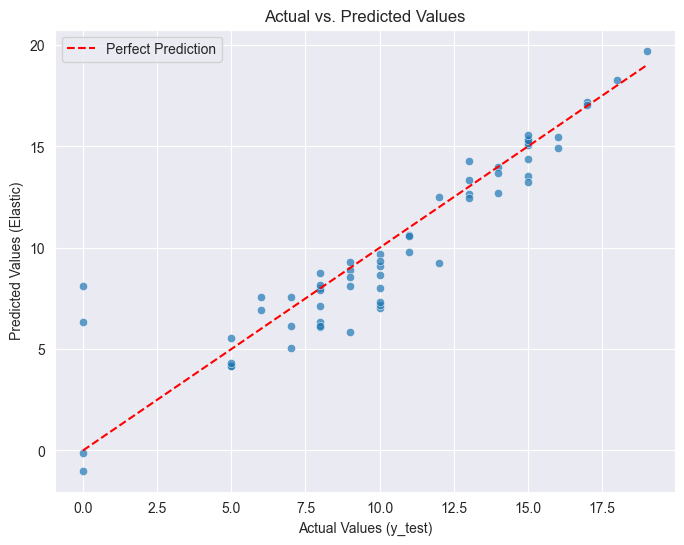

In [78]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=el_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (Elastic)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

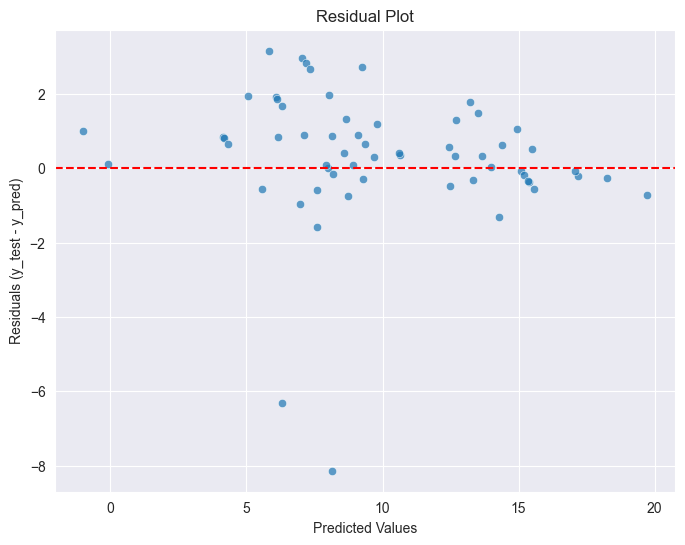

In [79]:
residuals = y_test - el_test_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=el_test_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')

plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y_test - y_pred)")
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Histogram of Residuals')

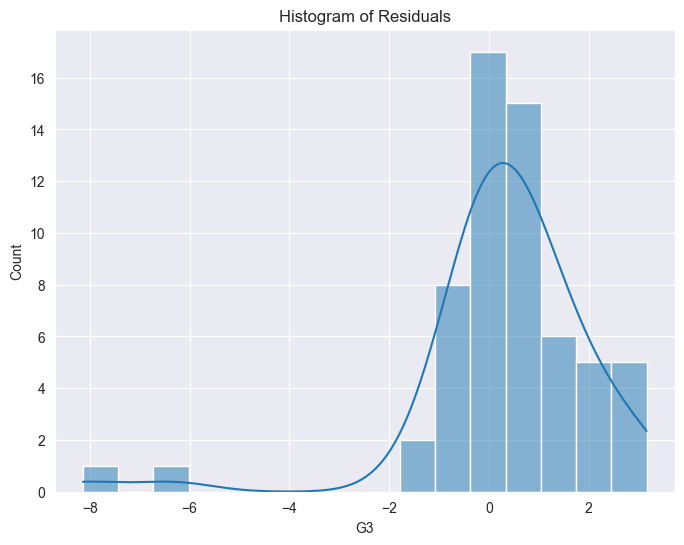

In [80]:
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")


In [90]:
elastic_coef = best_mdl.named_steps['model'].coef_
pd.DataFrame({
    'feature': X.columns,
    'LinearRegression': coef,
    'ElasticNet': elastic_coef
})

,feature,LinearRegression,ElasticNet
0,age,-0.265592,-0.169294
1,sex,0.066140,0.000000
2,studytime,-0.018901,-0.000000
3,absences,0.329864,0.215172
4,G1,0.606272,0.600825
5,G2,3.590654,3.480499
